In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Arial']

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE
import statsmodels.api as sm

In [2]:
data = pd.read_csv('/Users/csuen/Documents/GitHub/ozone-radical/Main Analysis/extended indicators/I5 MeOO_OH.csv')

In [3]:
data = data[data['region']!="SGP"]
data = data[data['region']!="VAN"]

In [4]:
data

,region,beta_adj,beta_adj_ste,ch4__no,ch4__no_ste,ln_beta_adj,ln_ch4__no
0,AUS,4.555445,0.185354,5066.771122,544.255305,1.516323,1.622704
1,BRA,15.200451,0.406087,15616.606013,935.640919,2.721325,2.748335
2,BTH,0.434580,0.001010,35.101987,2.847914,-0.833376,-3.349498
3,CA,1.009988,0.031413,448.164764,55.769481,0.009938,-0.802594
4,CCE,0.759536,0.011856,643.790320,118.890357,-0.275048,-0.440382
5,COD,6.836903,0.294231,10816.604769,647.046723,1.922335,2.381082
6,DEU,1.255336,0.017843,837.684367,61.127541,0.227403,-0.177114
7,FIN,6.205083,0.201631,6838.638668,743.502521,1.825369,1.922589
8,FRA,2.447504,0.029990,2478.427004,107.142543,0.895069,0.907624
9,GBA,0.621936,0.010834,225.422179,33.625253,-0.474918,-1.489780


In [5]:
data_sens = pd.read_csv('Fig. 3b SnSv sensitivities scatter plot.csv')

In [6]:
mod = LinearRegression()
X = data[['ln_beta_adj']]
y = data['ln_ch4__no']
mod.fit(X,y)
print(mod.coef_)
print(mod.intercept_)
y_pred = mod.predict(X)
print(r2_score(y_pred, y))
print(np.sqrt(MSE(y_pred, y)))

[1.43680059]
-0.5974999644080777
0.870550425458718
0.48823275255365817


In [7]:
mod = LinearRegression()
X_2 = np.log(data[['ln_beta_adj']]+1)
y = data['ln_ch4__no']
mod.fit(X_2,y)
print(mod.coef_)
print(mod.intercept_)
y_pred = mod.predict(X_2)
print(r2_score(y_pred, y))
print(np.sqrt(MSE(y_pred, y)))

[2.06213621]
-0.28036808848506556
0.9168261137711523
0.3996266348716


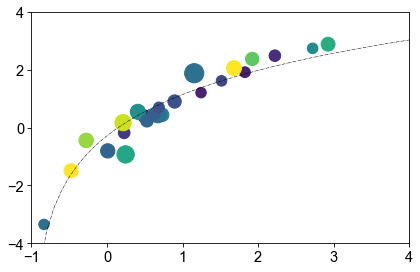

In [8]:
fig, ax = plt.subplots(figsize=(6.5, 4), dpi=75)
X = data['ln_beta_adj']
y = data['ln_ch4__no']
size = data_sens['o3_ppb']
o3net = data_sens['o3net_mole']

x_set = np.arange(-1,5,0.1)
y_set = np.log(x_set+1)*mod.coef_+mod.intercept_
plt.plot(x_set, y_set, linestyle='-.', linewidth=0.5, color="black")

plt.scatter(X, y, s=size**1.5, vmin=0, vmax=1.5, c=o3net, cmap="viridis")

#plt.colorbar()
plt.xlim([-1,4])
plt.ylim([-4,4])
plt.yticks([-4,-2,0,2,4], fontsize=14)
plt.xticks([-1,0,1,2,3,4], fontsize=14)

plt.savefig("Fig. 3g d_CH3O2_OH.pdf", format="pdf", bbox_inches="tight")